# The Diffractive pupil automated generation and optimisation pipeline

To run:
>  - Set pupil and simulations settings desired in pupil_inputs.txt and simulation_settings.txt
>  - Set the batch name, batch_size and modification function inputs in driver.py
>  - Run the script driver.py

To analyse pupils:
>  - Go into the folder named after your batch
>  - Pupils are conatined within their own directories labeled by their unique id
>  - To see the current ranking of best pupils go into "rankings.txt"
>  - To see the current best values of each heuristic, open the file "RWGE.txt" (as an example) and you can see the structure laid out as 'rank, id, value'
>  - To then view and analyse that pupil, copy the id of the pupil you wish to see and paste it into this notebook

To Do:
 - Create a more algorithmic method to optimise the pupils
 - Create some more wavefront optimising functions
 - Create a better ranking method than current

In [5]:
from lib.primary_functions import *
from lib.pupil_loaders import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

In [45]:
batch_name = "test2"# Fill in batch name
uid = "9290373116" # Fill in uid
path = os.getcwd() + '/' + batch_name
pupil_object = load_pupil_file(path, uid)

### View the pupil

MAXIMISE:						| MINIMISE: 						
_____________________________________________________________________________________________________________
RWGE over array:	48033.291704955416   		| Peak pixel value:	0.14107324711676275 				
RWGE inside 4.0 λ/D 	18044.054465362966 		| Central pixel value:	0.14107324711676275 				
% Power inside 4.0 λ/D 52.533195455056884 		|							
_____________________________________________________________________________________________________________



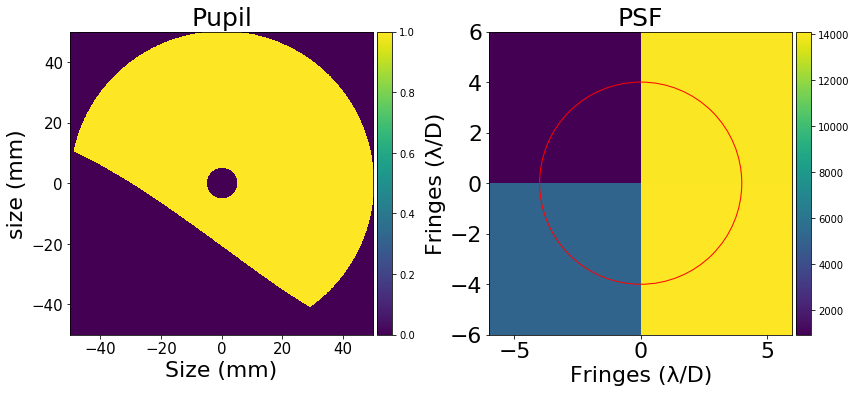

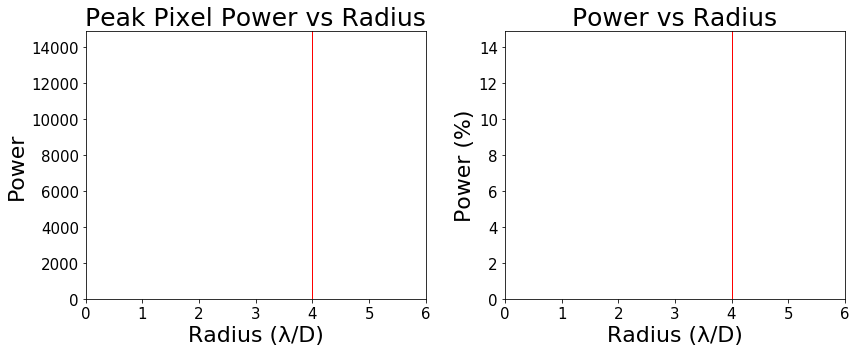

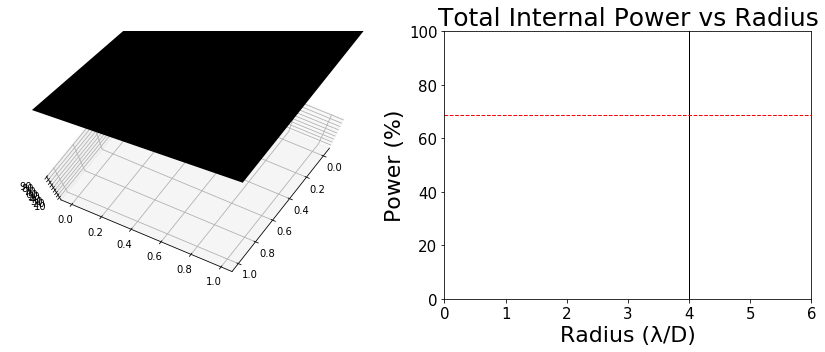

_________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________




In [46]:
pupil_inputs, simulation_settings = load_batch_data(os.getcwd())

aperture = simulation_settings["aperture"]
npixels = simulation_settings["detector_size"]
wl = simulation_settings["wavelength"]
fl = simulation_settings["focal_length"]
detector_pitch = simulation_settings["detector_pitch"]
num_fringes = simulation_settings["fringe_extent"]

# Image viewing extent
fringe_extent_im = 1.5*num_fringes

# Graph viewing extent
fringe_extent_graph = fringe_extent_im

# Horizontal line fringe values
fringe_0 = num_fringes

# 3D plot viewing angle
elev_angle = 80
azim_angle = 30

# Calculate needed values
c = npixels//2
pixel_radii_0 = fl*tan(fringe_0*wl/aperture)/detector_pitch
pixel_extent_im = int(fl*tan(2*fringe_extent_im*wl/aperture)/detector_pitch)
pixel_extent_graph = int(fl*tan(2*fringe_extent_graph*wl/aperture)/detector_pitch)
xvals = np.linspace(0, fringe_extent_im, pixel_extent_im//2)
index_0 = int(fringe_0*pixel_extent_graph/(2*fringe_extent_graph))

# Plot
pupil = pupil_object.images["pupil"]
im_out = pupil_object.images["PSF"]
regions = pupil_object.visual_analysis["regions"]
peaks = pupil_object.visual_analysis["peaks"]
cum_sum = pupil_object.visual_analysis["cum_sum"]

# print Heuristiscs
print("MAXIMISE:\t\t\t\t\t\t| MINIMISE: \t\t\t\t\t\t\n\
_____________________________________________________________________________________________________________\n\
RWGE over array:\t{0}   \t\t| Peak pixel value:\t{1} \t\t\t\t\n\
RWGE inside {5} λ/D \t{2} \t\t| Central pixel value:\t{3} \t\t\t\t\n\
% Power inside {5} λ/D {4} \t\t|\t\t\t\t\t\t\t\n\
_____________________________________________________________________________________________________________\n"
.format(pupil_object.heuristics["RWGE"], pupil_object.heuristics["PEAK"], pupil_object.heuristics["FTRWGE"], pupil_object.heuristics["CENTRAL"],\
        pupil_object.heuristics["RATIO"], num_fringes))

# First set
######
fig, axs = plt.subplots(1, 2, figsize=(12,12))

# First figure
extent = -aperture*1e3/2, aperture*1e3/2, -aperture*1e3/2, aperture*1e3/2
im = axs[0].imshow(np.abs(np.angle(pupil)/np.pi), extent=extent)
plt.colorbar(im, cax=make_axes_locatable(axs[0]).append_axes("right", size="5%", pad=0.05))
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_title("Pupil", fontsize=25)
axs[0].set_xlabel("Size (mm)", fontsize=22)
axs[0].set_ylabel("size (mm)", fontsize=22) 

# Second figure
extent = -fringe_extent_im, fringe_extent_im, -fringe_extent_im, fringe_extent_im
im = axs[1].imshow(im_out[int(c-pixel_extent_im//2):int(c+pixel_extent_im//2),\
                          int(c-pixel_extent_im//2):int(c+pixel_extent_im//2)]*1e5, extent=extent)
axs[1].tick_params(axis='both', which='major', labelsize=22)
axs[1].set_title("PSF", fontsize=25)
axs[1].set_xlabel("Fringes (\u03BB/D)", fontsize=22)
axs[1].set_ylabel("Fringes (\u03BB/D)", fontsize=22) 
axs[1].add_artist(plt.Circle((0, 0), fringe_0, color='r', fill=False))#, linewidth=0.5))

plt.colorbar(im, cax=make_axes_locatable(axs[1]).append_axes("right", size="5%", pad=0.05))
plt.tight_layout()
plt.show() 

# Second set
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Third figures
im = axs[0].plot(xvals[:pixel_extent_graph//2],peaks[:pixel_extent_graph//2]*1e5)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_xlim(xmin=0, xmax=fringe_extent_graph)
axs[0].set_ylim(ymin=0)
axs[0].set_title("Peak Pixel Power vs Radius", fontsize=25)
axs[0].set_xlabel("Radius (\u03BB/D)", fontsize=22)
axs[0].set_ylabel("Power", fontsize=22)
axs[0].axvline(x=fringe_0, color='r', linewidth=1)

# Fourth figure
im = axs[1].plot(xvals[:pixel_extent_graph//2],regions[:pixel_extent_graph//2]*100)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].set_xlim(xmin=0, xmax=fringe_extent_graph)
axs[1].set_ylim(ymin=0)
axs[1].set_title("Power vs Radius", fontsize=25)
axs[1].set_xlabel("Radius (\u03BB/D)", fontsize=22)
axs[1].set_ylabel("Power (%)", fontsize=22) 
axs[1].axvline(x=fringe_0, color='r', linewidth=1)

plt.tight_layout()
plt.show()

# Third set
fig=plt.figure(figsize=(12,5))

# Fifth Figure
axs0 = fig.add_subplot(1,2,1,projection='3d')
plot_3d = im_out[int(c-pixel_extent_im//2):int(c+pixel_extent_im//2),\
                 int(c-pixel_extent_im//2):int(c+pixel_extent_im//2)]*1e5
plot_3d = ((plot_3d + 1)**0.05 - 1)*500
xx, yy = np.mgrid[0:plot_3d.shape[0], 0:plot_3d.shape[1]]
surf = axs0.plot_surface(xx, yy, plot_3d ,rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0)
axs0.view_init(elev=elev_angle, azim=azim_angle)
axs0.set_zlim3d(1,90)

# Sixth figure
axs1 = fig.add_subplot(1,2,2)
im = axs1.plot(xvals[:pixel_extent_graph//2],cum_sum[:pixel_extent_graph//2]*100)
axs1.tick_params(axis='both', which='major', labelsize=15)
axs1.set_xlim(xmin=0, xmax=fringe_extent_graph)
axs1.set_ylim(ymin=0, ymax=100)
axs1.set_title("Total Internal Power vs Radius", fontsize=25)
axs1.set_xlabel("Radius (\u03BB/D)", fontsize=22)
axs1.set_ylabel("Power (%)", fontsize=22)
axs1.axvline(x=num_fringes, color='k', linewidth=1)
axs1.axhline(y=cum_sum[index_0]*100, linestyle='--', linewidth=1, color='r')

plt.tight_layout()
# fig.savefig(image_path + "3d_model")
plt.show()

print("_________________________________________________________________________________________________________________________")
print("_________________________________________________________________________________________________________________________")
print("_________________________________________________________________________________________________________________________\n\n")

In [42]:
print(pupil_object.history)

['.']
